<a href="https://colab.research.google.com/github/AdarshBT18/MyRep/blob/master/PyTorch_MNIST_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
import seaborn as sns


In [60]:
batch_size = 5
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [61]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([5, 1, 28, 28])
torch.Size([1, 28, 28])
6


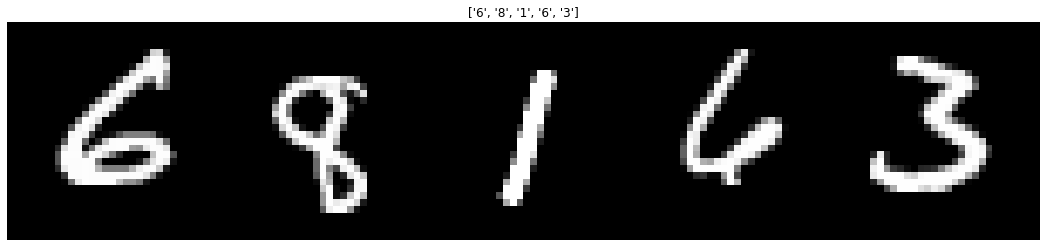

In [62]:
def imshow(img, title):
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels
    
images, labels = show_batch_images(trainloader)

In [63]:
batch_size = 24
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

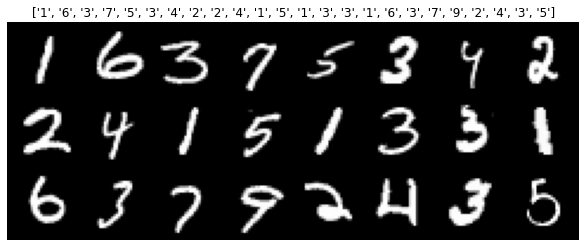

In [64]:
def imshow(img, title):
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

def show_batch_images(trainloader):
    images, labels = next(iter(trainloader))
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels
    
images, labels = show_batch_images(trainloader)

In [65]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [66]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_bn(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [67]:
class CNN_BN(nn.Module):
    def __init__(self): 
        super(CNN_BN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 3, 5),         # (N, 1, 28, 28) -> (N,  3, 24, 24)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 3, 24, 24) -> (N,  3, 12, 12)
            nn.Conv2d(3, 6, 3),
            nn.BatchNorm2d(6)           # (N, 3, 12, 12) -> (N,  6, 10, 10) 
        )
        self.features1 = nn.Sequential(
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N, 6, 10, 10) -> (N,  6, 5, 5)
        )
        self.classifier = nn.Sequential(
            nn.Linear(150, 25),         # (N, 150) -> (N, 25)
            torch.nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(25,10)            # (N, 25) -> (N, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.features1(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [68]:
model_bn = CNN_BN().to(device)
print(model_bn)

CNN_BN(
  (features): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (features1): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Linear(in_features=150, out_features=25, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=25, out_features=10, bias=True)
  )
)


In [69]:
loss_fn = nn.CrossEntropyLoss()
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

Epoch: 0/11, Test acc: 91.04, Train acc: 91.08
Epoch: 1/11, Test acc: 94.00, Train acc: 93.78
Epoch: 2/11, Test acc: 94.95, Train acc: 94.91
Epoch: 3/11, Test acc: 95.49, Train acc: 95.63
Epoch: 4/11, Test acc: 95.75, Train acc: 95.81
Epoch: 5/11, Test acc: 96.03, Train acc: 96.01
Epoch: 6/11, Test acc: 96.37, Train acc: 96.34
Epoch: 7/11, Test acc: 96.67, Train acc: 96.62
Epoch: 8/11, Test acc: 96.70, Train acc: 96.74
Epoch: 9/11, Test acc: 96.83, Train acc: 96.90
Epoch: 10/11, Test acc: 97.06, Train acc: 97.08


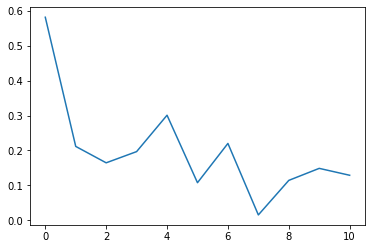

CPU times: user 3min 39s, sys: 2.01 s, total: 3min 41s
Wall time: 3min 42s


In [70]:
%%time
loss_bn_arr = []

max_epochs = 11

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):
      
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # training steps for bn model
      opt_bn.zero_grad()
      outputs_bn = model_bn(inputs)
      loss_bn = loss_fn(outputs_bn, labels)
      loss_bn.backward()
      opt_bn.step()
        
    loss_bn_arr.append(loss_bn.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_bn_arr)
plt.show()

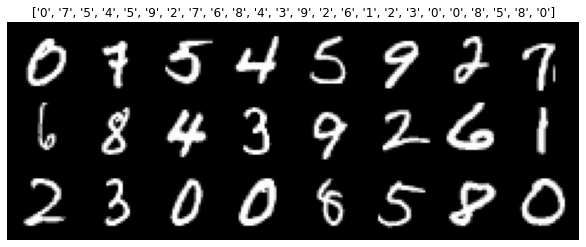

In [71]:
def imshow(img, title):
    
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

def show_batch_images(testloader):
    images, labels = next(iter(testloader))
    
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])
    
    return images, labels
    
images, labels = show_batch_images(trainloader)